In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read data
df = pd.read_csv(filepath_or_buffer="../Data Preprocessing/Filled missing values using KNN (John)/final_synthesis(KNN).csv", delimiter=',', index_col=0)

X = df.iloc[:, 2:-1].values #
y = df.iloc[:, -1].values #
# y = np.asarray([int(round(x)) for x in y]) # Categorize them to 0-10

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

# Feature Scaling for numerical attributes only
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)

X_train = np.around(X_train, decimals=8)
X_test = np.around(X_test, decimals=8)



In [42]:
# min_max_scaler = preprocessing.MinMaxScaler()
# y_train = min_max_scaler.fit_transform(y_train.reshape(-1,1))
# y_test = min_max_scaler.fit_transform(y_test.reshape(-1,1))
# y_train = np.around(y_train, decimals=8)
# y_test = np.around(y_test, decimals=8)

In [43]:
from sklearn.metrics import mean_squared_error

mse = []
reg_model = ['linear_model', 'Ridge', 'Lasso', 'LassoLars', 'OrthogonalMatchingPursuit', 'BayesianRidge', 'HuberRegressor']
predictions = []


from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
# reg.score(X_train, y_train)
# reg.coef_
# reg.intercept_
y_pred = reg.predict(X_test)
predictions.append(y_pred)
mse.append(mean_squared_error(y_test, y_pred))

reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
predictions.append(y_pred)
mse.append(mean_squared_error(y_test, y_pred))

reg = linear_model.Lasso(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
predictions.append(y_pred)
mse.append(mean_squared_error(y_test, y_pred))

reg = linear_model.LassoLars(alpha=0.1)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
predictions.append(y_pred)
mse.append(mean_squared_error(y_test, y_pred))

reg = linear_model.OrthogonalMatchingPursuit()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
predictions.append(y_pred)
mse.append(mean_squared_error(y_test, y_pred))

reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
predictions.append(y_pred)
mse.append(mean_squared_error(y_test, y_pred))


reg = linear_model.HuberRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
predictions.append(y_pred)
mse.append(mean_squared_error(y_test, y_pred))

data_tuples = list(zip(reg_model,mse))
show = pd.DataFrame(data_tuples, columns=['Regression model','Mean Squared Error'])

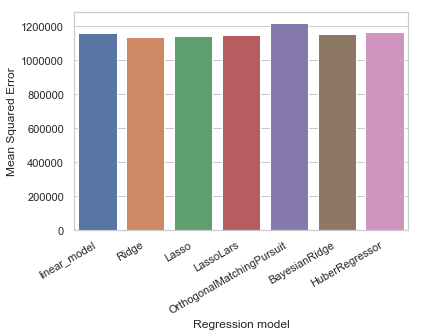

In [44]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="Regression model", y="Mean Squared Error", data=show)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

ix = list(range(0,864))
# plt.plot(ix, y_pred,label='Predictions')
# plt.plot(ix, y_test, label='Ground truth')
# plt.legend()
# plt.ylim(0,6000)
# plt.xlim(0,50)
# plt.xlabel("Index of testing phone")
# plt.ylabel("Price")
# plt.show()


In [48]:
import plotly.express as px

for i in range(len(predictions)):
    pred_tuples = list(zip(ix,predictions[i]))
    actual_tuples = list(zip(ix,y_test))
    pred = pd.DataFrame(pred_tuples, columns = ['ix','y_pred'])
    actual = pd.DataFrame(actual_tuples, columns = ['ix','y_test'])

    fig = px.line(pred, x="ix", y="y_pred")
    fig.update_layout(
    title=reg_model[i] + " predictions")
    fig.add_scatter(x=actual['ix'], y=actual['y_test'], mode='lines')
    # fig = px.line(actual, x="ix", y="y_test")

    fig.show()